# CODE ALPHA INTERNSHIP

# TASK-2 

# STOCK PRICE PREDICTION USING LSTM

# JPMorgan Chase & Co


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
data = pd.read_excel("C:\\Users\\saisu\\OneDrive\\Documents\\MacroTrends_Data_Download_JPM.xlsx")

In [3]:
data.head()

,date,open,high,low,close,volume
0,1983-12-30,2.5663,2.5955,2.5371,2.5663,211500
1,1984-01-03,2.5628,2.5809,2.5441,2.5663,385502
2,1984-01-04,2.6153,2.6754,2.5809,2.6754,292500
3,1984-01-05,2.7302,2.7634,2.6975,2.7634,344102
4,1984-01-06,2.7343,2.7634,2.7051,2.7343,194400


In [4]:
data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [5]:
data.info

<bound method DataFrame.info of             date      open      high       low     close   volume
0     1983-12-30    2.5663    2.5955    2.5371    2.5663   211500
1     1984-01-03    2.5628    2.5809    2.5441    2.5663   385502
2     1984-01-04    2.6153    2.6754    2.5809    2.6754   292500
3     1984-01-05    2.7302    2.7634    2.6975    2.7634   344102
4     1984-01-06    2.7343    2.7634    2.7051    2.7343   194400
...          ...       ...       ...       ...       ...      ...
10124 2024-03-04  184.7100  187.5900  184.2700  186.6800  6997404
10125 2024-03-05  186.3600  189.3000  186.3600  188.5500  6384488
10126 2024-03-06  189.2500  190.0700  187.6300  189.5300  7552370
10127 2024-03-07  189.9100  190.5000  186.6300  187.8700  7332435
10128 2024-03-08  188.4400  190.4550  187.9200  188.2200  6131058

[10129 rows x 6 columns]>

In [6]:
data.shape

(10129, 6)

In [7]:
data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [8]:
data.isna().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [9]:
data.describe()

,open,high,low,close,volume
count,10129.000000,10129.000000,10129.000000,10129.000000,1.012900e+04
mean,35.460658,35.836493,35.073166,35.460365,1.308704e+07
std,39.783872,40.135185,39.444008,39.797258,1.681259e+07
min,1.169100,1.241000,1.097300,1.154300,3.780000e+04
25%,5.078800,5.121400,5.012800,5.069500,2.863500e+06
50%,23.111200,23.399800,22.732100,23.049000,8.783500e+06
75%,42.524400,42.903400,42.235500,42.622100,1.549882e+07
max,189.910000,190.500000,187.920000,189.530000,2.172942e+08


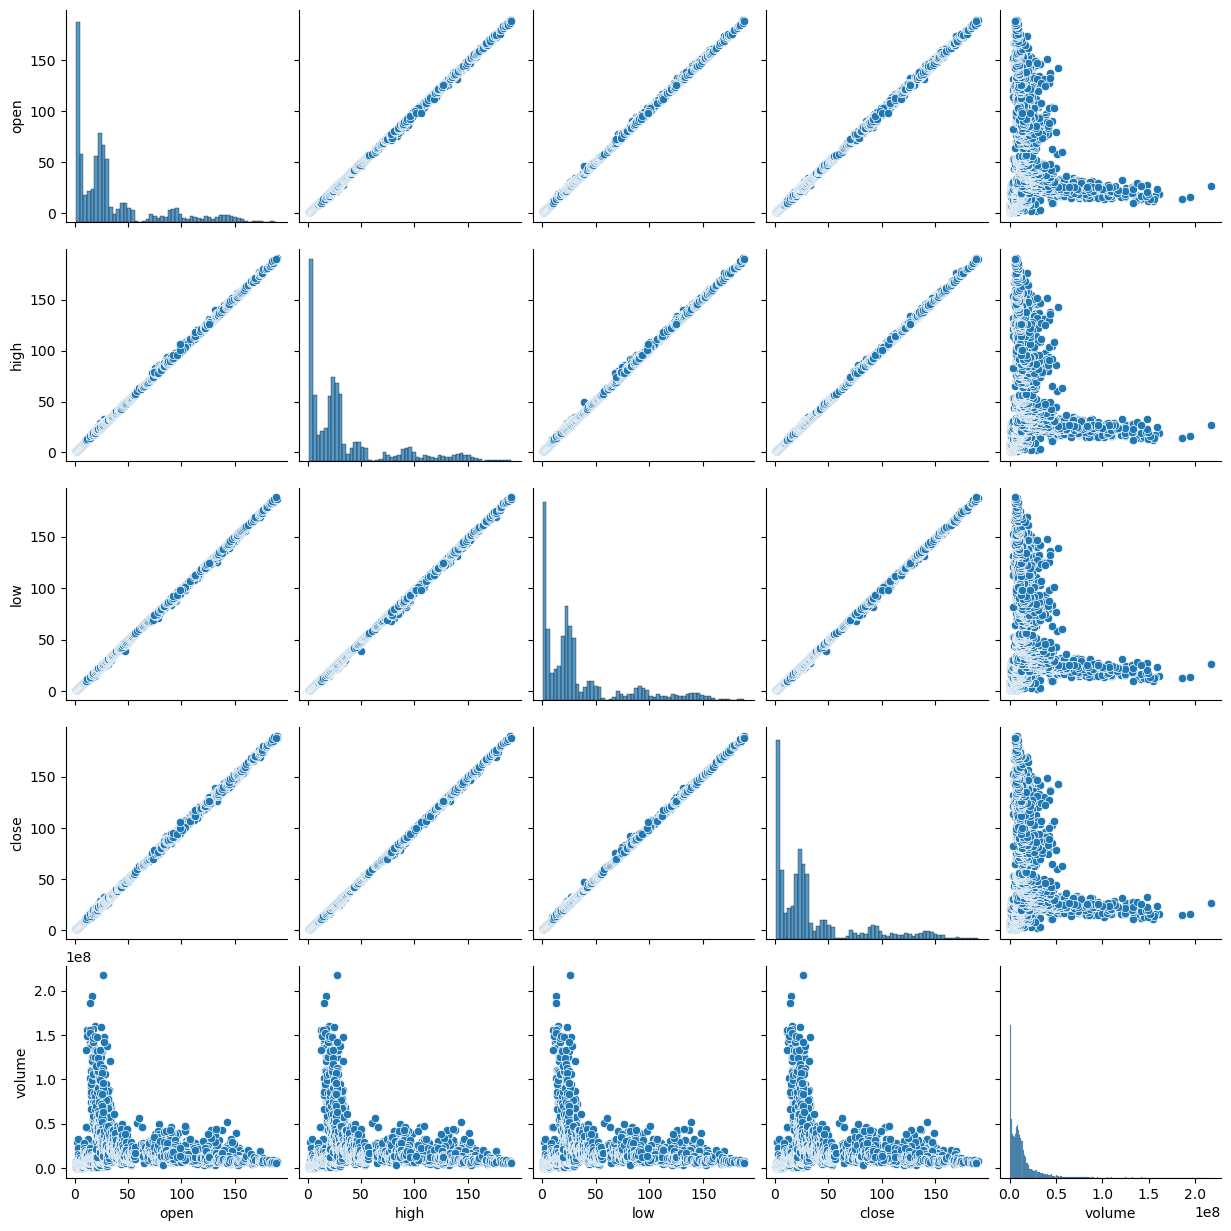

In [11]:
 visual = sns.pairplot(data)

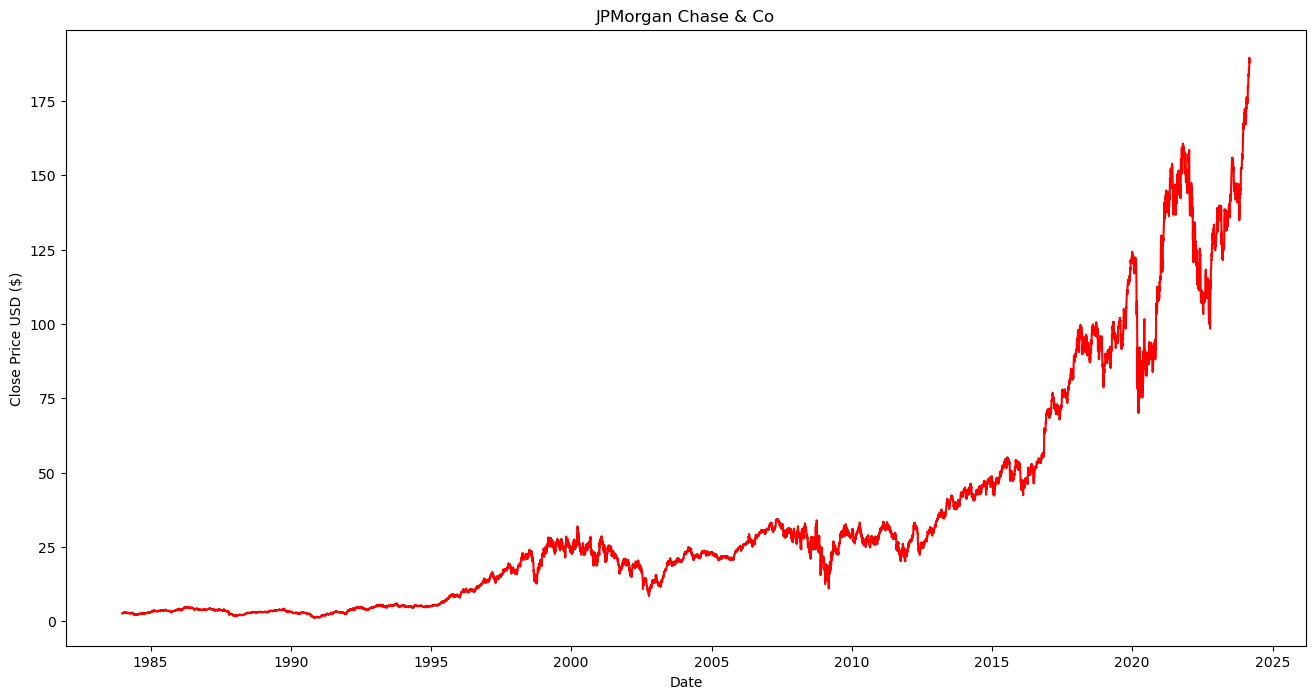

In [12]:
plt.figure(figsize=(16,8))
plt.title('JPMorgan Chase & Co')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(pd.to_datetime(data['date'],format='%Y-%m-%d'),data['close'],color='red')
plt.show()

In [14]:
df =pd.DataFrame({'Date': data['date'], 'Close': data['close']})
df =df.set_index('Date')
df

,Close
Date,
1983-12-30,2.5663
1984-01-03,2.5663
1984-01-04,2.6754
1984-01-05,2.7634
1984-01-06,2.7343
...,...
2024-03-04,186.6800
2024-03-05,188.5500
2024-03-06,189.5300


**X & y**

In [15]:
X = data[['open','high','low','volume']]
y = data['close']


In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

**TRAIN-TEST-SPLIT**

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state = 42)

**MODELLING**

**Importing the Keras libraries and packages**

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

**Initialising**

In [ ]:
model = Sequential()

**Adding the first LSTM layer and some Dropout regularisations**

In [26]:

model.add(LSTM(units= 50, return_sequences = True, input_shape=(X_train.shape[1], 1)))
          
model.add(Dropout(0.2))

**Adding the second LSTM layer and some Dropout regularisations**

In [27]:
model.add(LSTM(units= 50, return_sequences = True ))
          
model.add(Dropout(0.2))

**Adding the third LSTM layer and some Dropout regularisations**

In [28]:
model.add(LSTM(units= 50 ))

model.add(Dropout(0.2))

**Adding the output layer**

In [29]:
model.add(Dense(units = 1 ))

**compiling**

In [30]:
model.compile(optimizer = "adam", loss = "mean_squared_error")

**Fitting**

In [31]:
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 2392.6892
Epoch 2/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1602.1455
Epoch 3/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1208.7242
Epoch 4/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 969.7514
Epoch 5/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 775.0939
Epoch 6/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 623.9142
Epoch 7/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 480.0492
Epoch 8/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 354.0619
Epoch 9/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 306.0579
Epoch 10/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 257.6094
Epoch 11/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 203.0411
Epoch 12/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 161.2185
Epoch 13/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 132.5482
Epoch 14/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 106.3114
Epoch 15/100

254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 15.3905
Epoch 80/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 17.0191
Epoch 81/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 15.9866
Epoch 82/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 15.9373
Epoch 83/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 15.6122
Epoch 84/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 16.1193
Epoch 85/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 15.2007
Epoch 86/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 15.1005
Epoch 87/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 14.5688
Epoch 88/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 15.9232
Epoch 89/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 14.3211
Epoch 90/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 16.3775
Epoch 91/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 16.0169
Epoch 92/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 15.4413
Epoch 93/100
254/254 ━━━━━

In [35]:
pred = model.predict(X_test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


**Evaluation**

In [37]:
from sklearn import metrics
print('MSE:' , metrics.mean_squared_error(y_test,pred))
print('RMSE:' , np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('MAE:' , metrics.mean_absolute_error(y_test,pred))
print('R2:' , metrics.r2_score(y_test,pred))

MSE: 1.8345038438484282
RMSE: 1.354438571456243
MAE: 0.8990714949320712
R2: 0.9987775026064964


In [42]:
y_pred = model.predict(X_test).flatten()
result = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred, 'Loss': np.abs(y_test.values.flatten() - y_pred)})
result


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Actual,Predicted,Loss
0,90.8479,91.397484,0.549584
1,3.7182,3.796497,0.078297
2,2.7144,3.175117,0.460717
3,44.3443,45.527473,1.183173
4,19.5418,20.399954,0.858154
...,...,...,...
2021,144.1667,146.944748,2.778048
2022,74.2264,75.550743,1.324343
2023,144.8384,149.018036,4.179636
2024,94.9967,96.330360,1.333660


Text(0.5, 1.0, 'Actual vs Predicted')

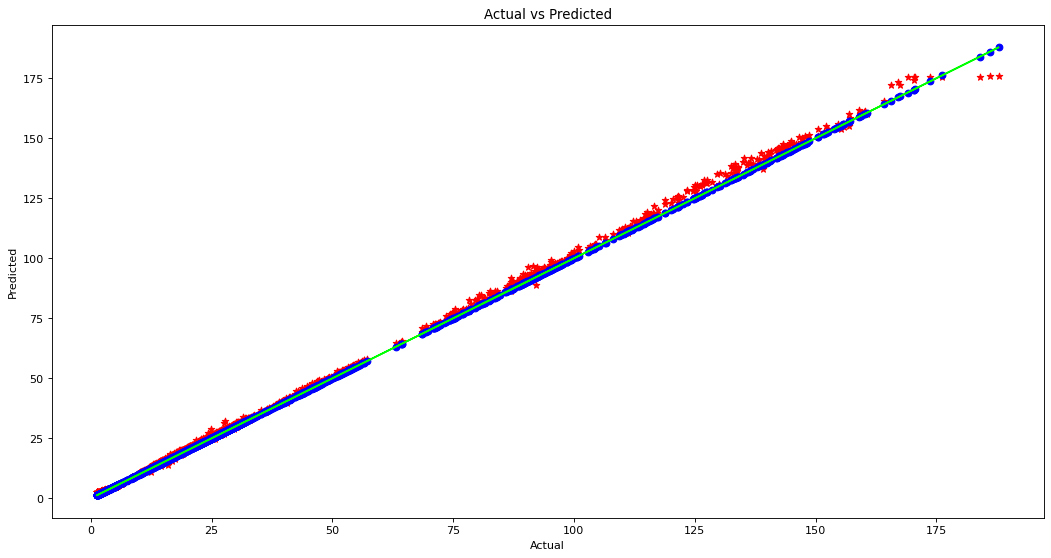

In [43]:
plt.figure(figsize=(16,8),dpi=80)
plt.scatter(y_test,y_pred,color='red',marker='*')
plt.scatter(y_test,y_test,color='blue')
plt.plot(y_test,y_test,color='lime')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


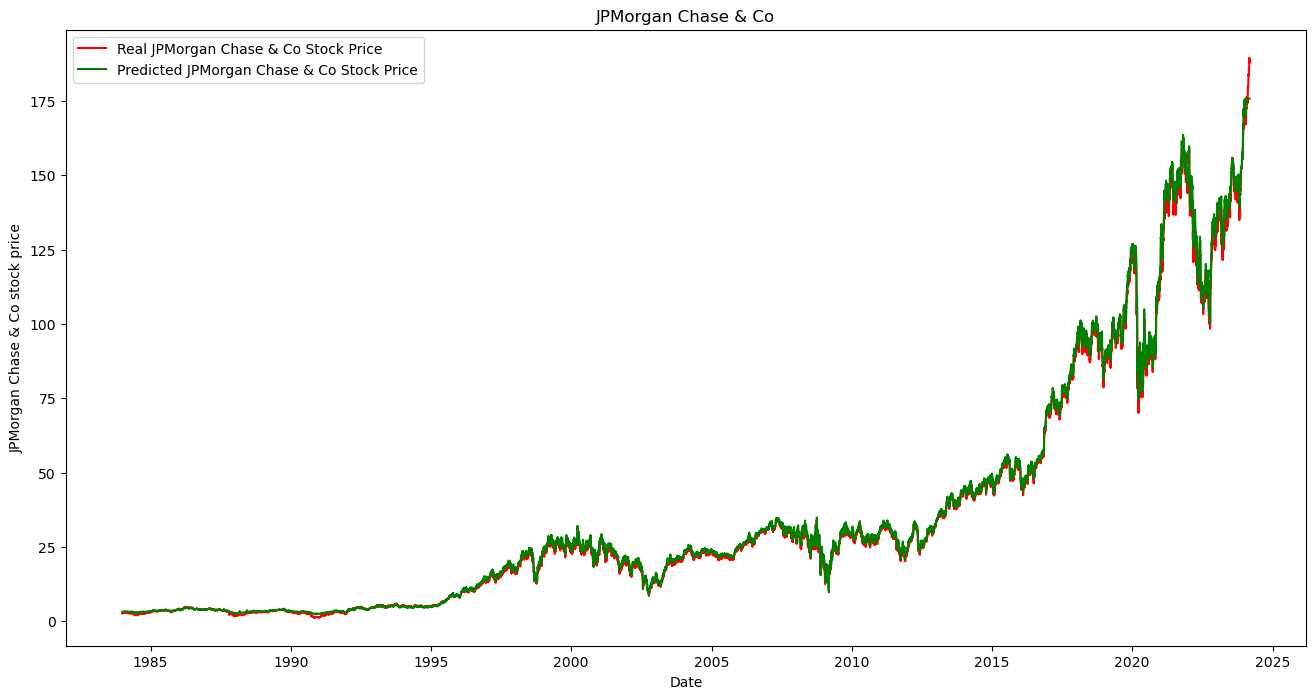

In [53]:
# data visualization 
plt.figure(figsize=(16,8))

plt.plot(pd.to_datetime(data['date'],format='%Y-%m-%d'),data['close'],color='red', label = "Real JPMorgan Chase & Co Stock Price")
plt.plot(pd.to_datetime(data['date'],format='%Y-%m-%d'),model.predict(X),color='green',label="Predicted JPMorgan Chase & Co Stock Price")

plt.title('JPMorgan Chase & Co')
plt.xlabel('Date')
plt.ylabel('JPMorgan Chase & Co stock price')
plt.legend()
plt.show()